In [1]:
import ctypes
libgcc_s = ctypes.CDLL('libgcc_s.so.1')
import torch
#torch.manual_seed(0)
from torchvision import datasets, transforms

from projections import LayerModifierZCA
from notebook_train import run_train_test_loop, test
from cifar_model import mCNN_k, mCNN_k_g, mCNN_fixed


# Mode 0 i.e. equivalent to Gated Linear Units = Sigmoid$(w_1^Tx)*(w_2^Tx)$, both $w_1, w_2$ are learnable, works as well as ReLUs.

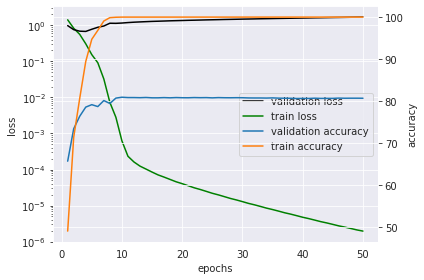

best acc: 80.95


In [4]:
# for now, no augmentations



device = torch.device("cuda")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset1 = datasets.CIFAR10('../data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.CIFAR10('../data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, num_workers = 4, pin_memory = True, batch_size=125, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset2,  num_workers = 4, pin_memory = True, batch_size=125)

#print('a')

model = mCNN_k_g().to(device)

#print('b')    
    
retrain = True
if retrain:
    run_train_test_loop(model, train_loader, test_loader, "cifar_10_g0", epochs=50, device=device)    

#print('c')    
    



In [5]:
model = mCNN_k_g().cuda().eval()
state_dict = torch.load("models/cifar_10_g0.pt",) # map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
test(model, device, test_loader, torch.nn.CrossEntropyLoss())

(1.1548151664435864, 80.95)

# Mode 1 i.e. = Sigmoid$(w_1^Tx)*(w_{\text{init}}^Tx)$, only $w_1$ is learnable.

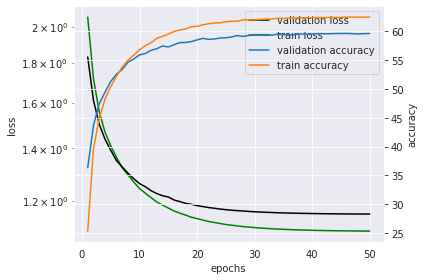

best acc: 59.65


In [6]:
# for now, no augmentations



device = torch.device("cuda")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset1 = datasets.CIFAR10('data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.CIFAR10('data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, num_workers = 4, pin_memory = True, batch_size=125, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset2,  num_workers = 4, pin_memory = True, batch_size=125)

#print('a')

model = mCNN_k_g(mode=1).to(device)

#print('b')    
    
retrain = True
if retrain:
    run_train_test_loop(model, train_loader, test_loader, "cifar_10_g1", epochs=50, device=device)    

#print('c')    
    



In [7]:
model = mCNN_k_g(mode=1).cuda().eval()
state_dict = torch.load("models/cifar_10_g1.pt",) # map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
test(model, device, test_loader, torch.nn.CrossEntropyLoss())

(1.1544224351644516, 59.65)

# Mode 2 i.e. = Sigmoid$(w_{\text{init}}^Tx)*(w_{2}^Tx)$, only $w_2$ is learnable.

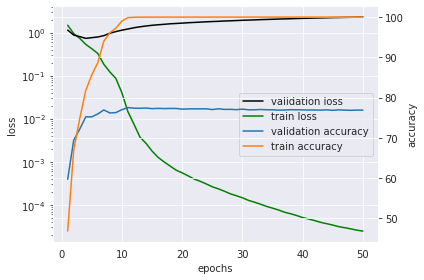

best acc: 77.51


In [8]:
# for now, no augmentations



device = torch.device("cuda")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset1 = datasets.CIFAR10('data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.CIFAR10('data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, num_workers = 4, pin_memory = True, batch_size=125, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset2,  num_workers = 4, pin_memory = True, batch_size=125)

#print('a')

model = mCNN_k_g(mode=2).to(device)

#print('b')    
    
retrain = True
if retrain:
    run_train_test_loop(model, train_loader, test_loader, "cifar_10_g2", epochs=50, device=device)    

#print('c')    
    



In [9]:
model = mCNN_k_g(mode=2).cuda().eval()
state_dict = torch.load("models/cifar_10_g2.pt",) # map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
test(model, device, test_loader, torch.nn.CrossEntropyLoss())

(1.2180578254163266, 77.51)

# Mode 2 i.e. = Sigmoid$(w_{\text{init}}^Tx)*(w_{2}^Tx)$, only $w_2$ is learnable WITH 4x width

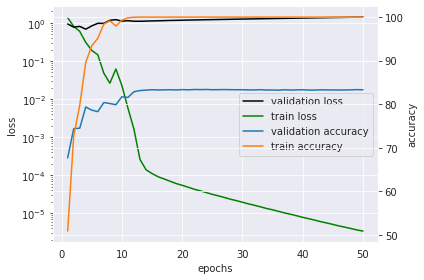

best acc: 83.38


In [10]:
# for now, no augmentations



device = torch.device("cuda")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset1 = datasets.CIFAR10('data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.CIFAR10('data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, num_workers = 4, pin_memory = True, batch_size=125, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset2,  num_workers = 4, pin_memory = True, batch_size=125)

#print('a')

model = mCNN_k_g(c = 256, mode=2).to(device)

#print('b')    
    
retrain = True
if retrain:
    run_train_test_loop(model, train_loader, test_loader, "cifar_10_g2", epochs=50, device=device)    

#print('c')    
    



In [11]:
model = mCNN_k_g(c = 256, mode=2).cuda().eval()
state_dict = torch.load("models/cifar_10_g2.pt",) # map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
test(model, device, test_loader, torch.nn.CrossEntropyLoss())

(1.2118349362164735, 83.38)

# Fixed Mode 0 i.e. normal neural network

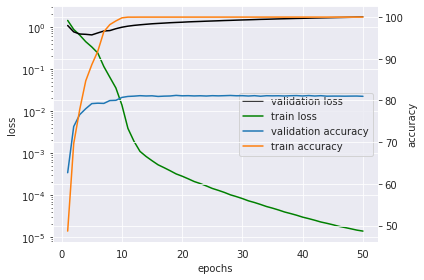

best acc: 81.22


In [12]:
# for now, no augmentations



device = torch.device("cuda")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset1 = datasets.CIFAR10('data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.CIFAR10('data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, num_workers = 4, pin_memory = True, batch_size=125, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset2,  num_workers = 4, pin_memory = True, batch_size=125)

#print('a')

model = mCNN_fixed().to(device)

#print('b')    
    
retrain = True
if retrain:
    run_train_test_loop(model, train_loader, test_loader, "cifar_10_f0", epochs=50, device=device)    

#print('c')    
    



In [13]:
model = mCNN_fixed().cuda().eval()
state_dict = torch.load("models/cifar_10_f0.pt",) # map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
test(model, device, test_loader, torch.nn.CrossEntropyLoss())

(1.2762156330049037, 81.22)

# Fixed Mode 1 i.e. fixing gating to init gating

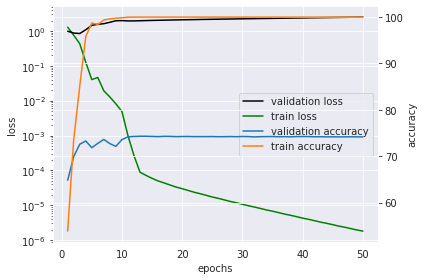

best acc: 74.31


In [14]:
# for now, no augmentations



device = torch.device("cuda")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset1 = datasets.CIFAR10('data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.CIFAR10('data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, num_workers = 4, pin_memory = True, batch_size=125, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset2,  num_workers = 4, pin_memory = True, batch_size=125)

#print('a')

model = mCNN_fixed(mode = 1).to(device)

#print('b')    
    
retrain = True
if retrain:
    run_train_test_loop(model, train_loader, test_loader, "cifar_10_f1", epochs=50, device=device)    

#print('c')    
    



In [15]:
model = mCNN_fixed(mode = 1).cuda().eval()
state_dict = torch.load("models/cifar_10_f1.pt",) # map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
test(model, device, test_loader, torch.nn.CrossEntropyLoss())

(1.9789395958185196, 74.31)

# Fixed Mode 1 i.e. fixing gating to init gating, WITH 4x width this time

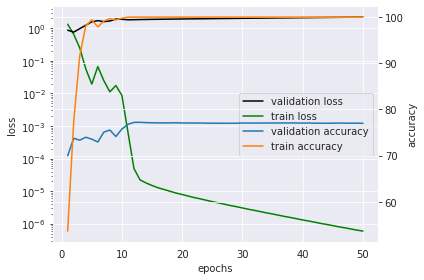

best acc: 77.2


In [16]:
# for now, no augmentations



device = torch.device("cuda")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset1 = datasets.CIFAR10('data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.CIFAR10('data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, num_workers = 4, pin_memory = True, batch_size=125, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset2,  num_workers = 4, pin_memory = True, batch_size=125)

#print('a')

model = mCNN_fixed(c = 256, mode = 1).to(device)

#print('b')    
    
retrain = True
if retrain:
    run_train_test_loop(model, train_loader, test_loader, "cifar_10_f1", epochs=50, device=device)    

#print('c')    
    



In [17]:
model = mCNN_fixed(c = 256, mode = 1).cuda().eval()
state_dict = torch.load("models/cifar_10_f1.pt",) # map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
test(model, device, test_loader, torch.nn.CrossEntropyLoss())

(1.850194238871336, 77.2)

# Fixed Mode 2 i.e. fixing gating to another init gating

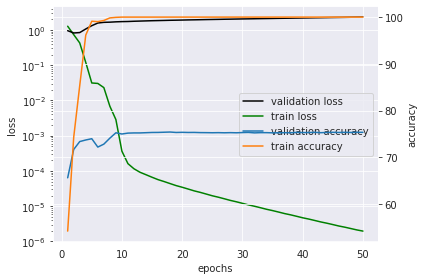

best acc: 75.39


In [18]:
# for now, no augmentations



device = torch.device("cuda")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset1 = datasets.CIFAR10('data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.CIFAR10('data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, num_workers = 4, pin_memory = True, batch_size=125, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset2,  num_workers = 4, pin_memory = True, batch_size=125)

#print('a')

model = mCNN_fixed(mode = 2).to(device)

#print('b')    
    
retrain = True
if retrain:
    run_train_test_loop(model, train_loader, test_loader, "cifar_10_f2", epochs=50, device=device)    

#print('c')    
    



In [19]:
model = mCNN_fixed(mode = 2).cuda().eval()
state_dict = torch.load("models/cifar_10_f2.pt",) # map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
test(model, device, test_loader, torch.nn.CrossEntropyLoss())

(1.8789202347397804, 75.39)

# Fixed Mode 3 i.e. no learning in Conv layers, linear still learnt, just a sanity check

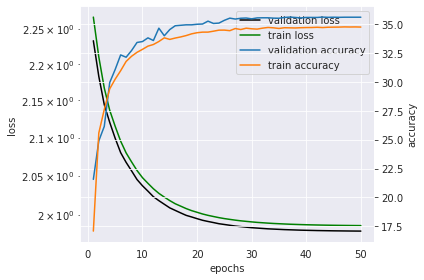

best acc: 35.63


In [20]:
# for now, no augmentations



device = torch.device("cuda")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset1 = datasets.CIFAR10('data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.CIFAR10('data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, num_workers = 4, pin_memory = True, batch_size=125, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset2,  num_workers = 4, pin_memory = True, batch_size=125)

#print('a')

model = mCNN_fixed(mode = 3).to(device)

#print('b')    
    
retrain = True
if retrain:
    run_train_test_loop(model, train_loader, test_loader, "cifar_10_f3", epochs=50, device=device)    

#print('c')    
    



In [21]:
model = mCNN_fixed(mode = 3).cuda().eval()
state_dict = torch.load("models/cifar_10_f3.pt",) # map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
test(model, device, test_loader, torch.nn.CrossEntropyLoss())

(1.9809390038251877, 35.63)

In [25]:
from cifar_model import ConvTwoStream # (inplanes, planes, stride)

In [28]:
ConvTwoStream(3, 64, 3)

TypeError: __init__() missing 1 required positional argument: 'kernel_size'

In [31]:
from torchinfo import summary


summary(model)

Layer (type:depth-idx)                   Param #
mCNN_fixed                               --
├─ConvTwoStream: 1-1                     --
│    └─Conv2d: 2-1                       (1,792)
│    └─Conv2d: 2-2                       (1,792)
├─ConvTwoStream: 1-2                     --
│    └─Conv2d: 2-3                       (73,728)
│    └─Conv2d: 2-4                       (73,728)
├─MaxPool2d: 1-3                         --
├─MaxPool2d: 1-4                         --
├─ConvTwoStream: 1-5                     --
│    └─Conv2d: 2-5                       (294,912)
│    └─Conv2d: 2-6                       (294,912)
├─ConvTwoStream: 1-6                     --
│    └─Conv2d: 2-7                       (1,179,648)
│    └─Conv2d: 2-8                       (1,179,648)
├─Flatten: 1-7                           --
├─Linear: 1-8                            5,120
Total params: 3,105,280
Trainable params: 5,120
Non-trainable params: 3,100,160